# Problem Statement:
Developing a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

#Methodology
- Data loading and exploaration
- Data cleaning
- Feature Enginnering
- Univariate Analysis
- Bivariate Analysis
- Multivariae Analysis
- Impact of ddifferent variabes on defaulters
- Insights
- Key Findings
- Recommendations

## Data loading and Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv('loan (1).csv')


In [ ]:
df.shape

(148670, 20)

In [ ]:
print(df.head().to_markdown())

|    |    ID |   year | loan_limit   | Gender            | loan_type   | loan_purpose   | business_or_commercial   |   loan_amount |   rate_of_interest |   Upfront_charges |   property_value | occupancy_type   |   income | credit_type   |   Credit_Score | co-applicant_credit_type   | age   |      LTV | Region   |   Status |
|---:|------:|-------:|:-------------|:------------------|:------------|:---------------|:-------------------------|--------------:|-------------------:|------------------:|-----------------:|:-----------------|---------:|:--------------|---------------:|:---------------------------|:------|---------:|:---------|---------:|
|  0 | 24890 |   2019 | cf           | Sex Not Available | type1       | p1             | nob/c                    |        116500 |             nan    |               nan |           118000 | pr               |     1740 | EXP           |            758 | CIB                        | 25-34 |  98.7288 | south    |        1 |
|  1 | 24891 |   2019 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

In [ ]:
print(df.describe().to_markdown())

|       |       ID |   year |     loan_amount |   rate_of_interest |   Upfront_charges |   property_value |    income |   Credit_Score |           LTV |        Status |
|:------|---------:|-------:|----------------:|-------------------:|------------------:|-----------------:|----------:|---------------:|--------------:|--------------:|
| count | 148670   | 148670 | 148670          |      112231        |         109028    |  133572          | 139520    |     148670     | 133572        | 148670        |
| mean  |  99224.5 |   2019 | 331118          |           4.04548  |           3225    |  497893          |   6957.34 |        699.789 |     72.7465   |      0.246445 |
| std   |  42917.5 |      0 | 183909          |           0.561391 |           3251.12 |  359935          |   6496.59 |        115.876 |     39.9676   |      0.430942 |
| min   |  24890   |   2019 |  16500          |           0        |              0    |    8000          |      0    |        500     |      0.967478 |   

In [ ]:
print(df.groupby('Status')[['loan_amount','income','property_value']].describe().to_markdown())


|   Status |   ('loan_amount', 'count') |   ('loan_amount', 'mean') |   ('loan_amount', 'std') |   ('loan_amount', 'min') |   ('loan_amount', '25%') |   ('loan_amount', '50%') |   ('loan_amount', '75%') |   ('loan_amount', 'max') |   ('income', 'count') |   ('income', 'mean') |   ('income', 'std') |   ('income', 'min') |   ('income', '25%') |   ('income', '50%') |   ('income', '75%') |   ('income', 'max') |   ('property_value', 'count') |   ('property_value', 'mean') |   ('property_value', 'std') |   ('property_value', 'min') |   ('property_value', '25%') |   ('property_value', '50%') |   ('property_value', '75%') |   ('property_value', 'max') |
|---------:|---------------------------:|--------------------------:|-------------------------:|-------------------------:|-------------------------:|-------------------------:|-------------------------:|-------------------------:|----------------------:|---------------------:|--------------------:|--------------------:|--------------------:|--

In [ ]:
print(df['Status'].value_counts().to_markdown())

|   Status |   count |
|---------:|--------:|
|        0 |  112031 |
|        1 |   36639 |


In [ ]:
print(df.isna().sum().to_markdown())
overall_null_percentage = df.isnull().sum().sum() / df.size * 100
print(f'Overall percentage of null values: {overall_null_percentage:.2f}%')


|                          |     0 |
|:-------------------------|------:|
| ID                       |     0 |
| year                     |     0 |
| loan_limit               |  3344 |
| Gender                   |     0 |
| loan_type                |     0 |
| loan_purpose             |   134 |
| business_or_commercial   |     0 |
| loan_amount              |     0 |
| rate_of_interest         | 36439 |
| Upfront_charges          | 39642 |
| property_value           | 15098 |
| occupancy_type           |     0 |
| income                   |  9150 |
| credit_type              |     0 |
| Credit_Score             |     0 |
| co-applicant_credit_type |     0 |
| age                      |   200 |
| LTV                      | 15098 |
| Region                   |     0 |
| Status                   |     0 |
| Risk_indicator           |     0 |
| Risk_indicator_1         |     0 |
Overall percentage of null values: 3.64%


###Observations
- The dataset consists of **148670** rows and **20** columns.
- The dataset has 3.38% of null values. Majority are from upfront charges, rate of interest,property value and LTV

In [ ]:
 print(df[(df['property_value'].isna() & (df['LTV']).isna()) & (df['rate_of_interest'].isna())& (df['Upfront_charges'].isna())]['Status'].value_counts().to_markdown())


|   Status |   count |
|---------:|--------:|
|        1 |   15096 |


In [ ]:
 print(df[(df['rate_of_interest'].isna())& (df['Upfront_charges'].isna())]['Status'].value_counts().to_markdown())

|   Status |   count |
|---------:|--------:|
|        1 |   36439 |


In [ ]:
df['Risk_indicator']= df[['property_value','LTV','rate_of_interest','Upfront_charges']].isna().all(axis=1)

In [ ]:
df['Risk_indicator_1']=df[['Upfront_charges','rate_of_interest']].isna().all(axis=1)

### Observation

**Defaulter Analysis:**
- There is a strong relation between nulls and defaulters.

- Out of all the records, the rows where **upfront charges, rate of interest, property value, and LTV** are all **null** correspond to **defaulters**. Specifically, there are 15,096 records where all four columns are null and are classified as defaulters.
- Additionally, there are 36,439 records where only **upfront charges and rate of interest are null**; these also correspond to **defaulters**.


**Note**
- I have created columns for cases where all four columns(Upfront charges, rate of interest, property value and LTV) were missing to show their relationship with defaulters indicationg high potential risk.
- Similarly, I have done this for cases where two columns were missing (Property value and LTV).
- Risk indicator = All 4 columns data missing
- Risk indicator_1 = 2 columnsdata missing (property value and LTV)


## Data Cleaning

In [ ]:
df['loan_limit'].fillna('cf', inplace=True)


In [ ]:
most_frequent_purpose=df['loan_purpose'].mode()[0]

df['loan_purpose'].fillna(most_frequent_purpose, inplace=True)

In [ ]:
df['Status'].replace({1:'defaulter',0:'not_defaulter'}, inplace=True)

In [ ]:
df['rate_of_interest']=df.groupby(['business_or_commercial','loan_type','loan_purpose'])['rate_of_interest'].transform(lambda x: x.fillna(x.median()))


In [ ]:
df.dropna(subset=['income'], inplace=True)

In [ ]:
Q1=np.percentile(df['loan_amount'],25)
Q3=np.percentile(df['loan_amount'],75)
IQR=Q3 -Q1
Lower_bound=Q3-1.4*IQR
Upper_bound=Q3+1.5*IQR


bins=[0, 100500.0, 296500.0, 796500.0, 3576500]
lables=['very_low','low','medium','high']
df['loan_amount_bins'] = pd.cut(df['loan_amount'], bins=bins, labels=lables, right=False)

print(0, Lower_bound,np.percentile(df['loan_amount'],50),Upper_bound,df['loan_amount'].max())

0 100500.0 296500.0 796500.0 3576500


In [ ]:
df['Upfront_charges']=df.groupby(['Region','loan_amount_bins'])['Upfront_charges'].transform(lambda x : x.fillna(x.median()))

In [ ]:
df['LTV']=df.groupby(['business_or_commercial','loan_type','loan_purpose'])['LTV'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df['property_value'].fillna((df['loan_amount']/df['LTV'])*100,inplace=True)


In [ ]:
df.dropna(subset='Upfront_charges',inplace =True)

In [ ]:
print(df.isna().sum().to_markdown())

|                          |   0 |
|:-------------------------|----:|
| ID                       |   0 |
| year                     |   0 |
| loan_limit               |   0 |
| Gender                   |   0 |
| loan_type                |   0 |
| loan_purpose             |   0 |
| business_or_commercial   |   0 |
| loan_amount              |   0 |
| rate_of_interest         |   0 |
| Upfront_charges          |   0 |
| property_value           |   0 |
| occupancy_type           |   0 |
| income                   |   0 |
| credit_type              |   0 |
| Credit_Score             |   0 |
| co-applicant_credit_type |   0 |
| age                      |   0 |
| LTV                      |   0 |
| Region                   |   0 |
| Status                   |   0 |
| Risk_indicator           |   0 |
| Risk_indicator_1         |   0 |
| loan_amount_bins         |   0 |


###Imputation Stretagy
- The rate of interest is not directly dependent on the loan amount and credit score. However, it generally depends on various factors such as the size of the loan, the purpose of the loan, and the type of loan. Therefore, for missing values, we can fill the nulls by grouping by categories and calculating the mean.
- In this analysis, I explored the relationship between upfront charges and loan amounts. So created bins based on the Interquartile Range (IQR) to minimize the influence of outliers on the median. Additionally, I grouped the binned loan amounts by region, as upfront charges are also affected by geographic factors.

- The formula for Loan-to-Value (LTV) is calculated as follows:
LTV= Property Value/ Loan Amount​

- While we could fill null values in LTV by using the average property value (0.75) according to market avg to calculate new property values, my assumption is to fill these nulls by grouping related categorical columns. This approach allows for more contextual filling, taking into account the nuances of the data.

- Used property value formula to impute null values for property value
- Property value = Loan amount/LTV
- For loan purpose imputed nulls with mode


## Feature Enginnering

### Creating Income Groups

In [ ]:
low_threshold=np.percentile(df['income'],25)
high_threshold=np.percentile(df['income'],75)
print(low_threshold)
print(high_threshold)

3720.0
8520.0


In [ ]:
df['Income_group'] = df['income'].apply(
    lambda x: 'low' if x < low_threshold else ('medium' if low_threshold <= x < high_threshold else 'rich'))


### Debt to income ratio (DTI)

In [ ]:
df['DTI']=df['loan_amount']/df['income']

**Strategy**
- I have created a **simplified Debt-to-Income (DTI)** ratio to analyze the relationship between loan amounts, income, and the likelihood of defaulting. This ratio will assist in identifying patterns that indicate how these factors interact and contribute to the risk of loan defaults
- Also created **Income groups** to explore more relations between income and likelihood of defauting the loans. This would help us to find some trends and patterns for different income brackets.
- Also created two columns Risk indicator and Risk indicator 1 based upon the null values that corresponds directly to defaulters indicating high risk associated with loan defaults.


## Univarient Analysis


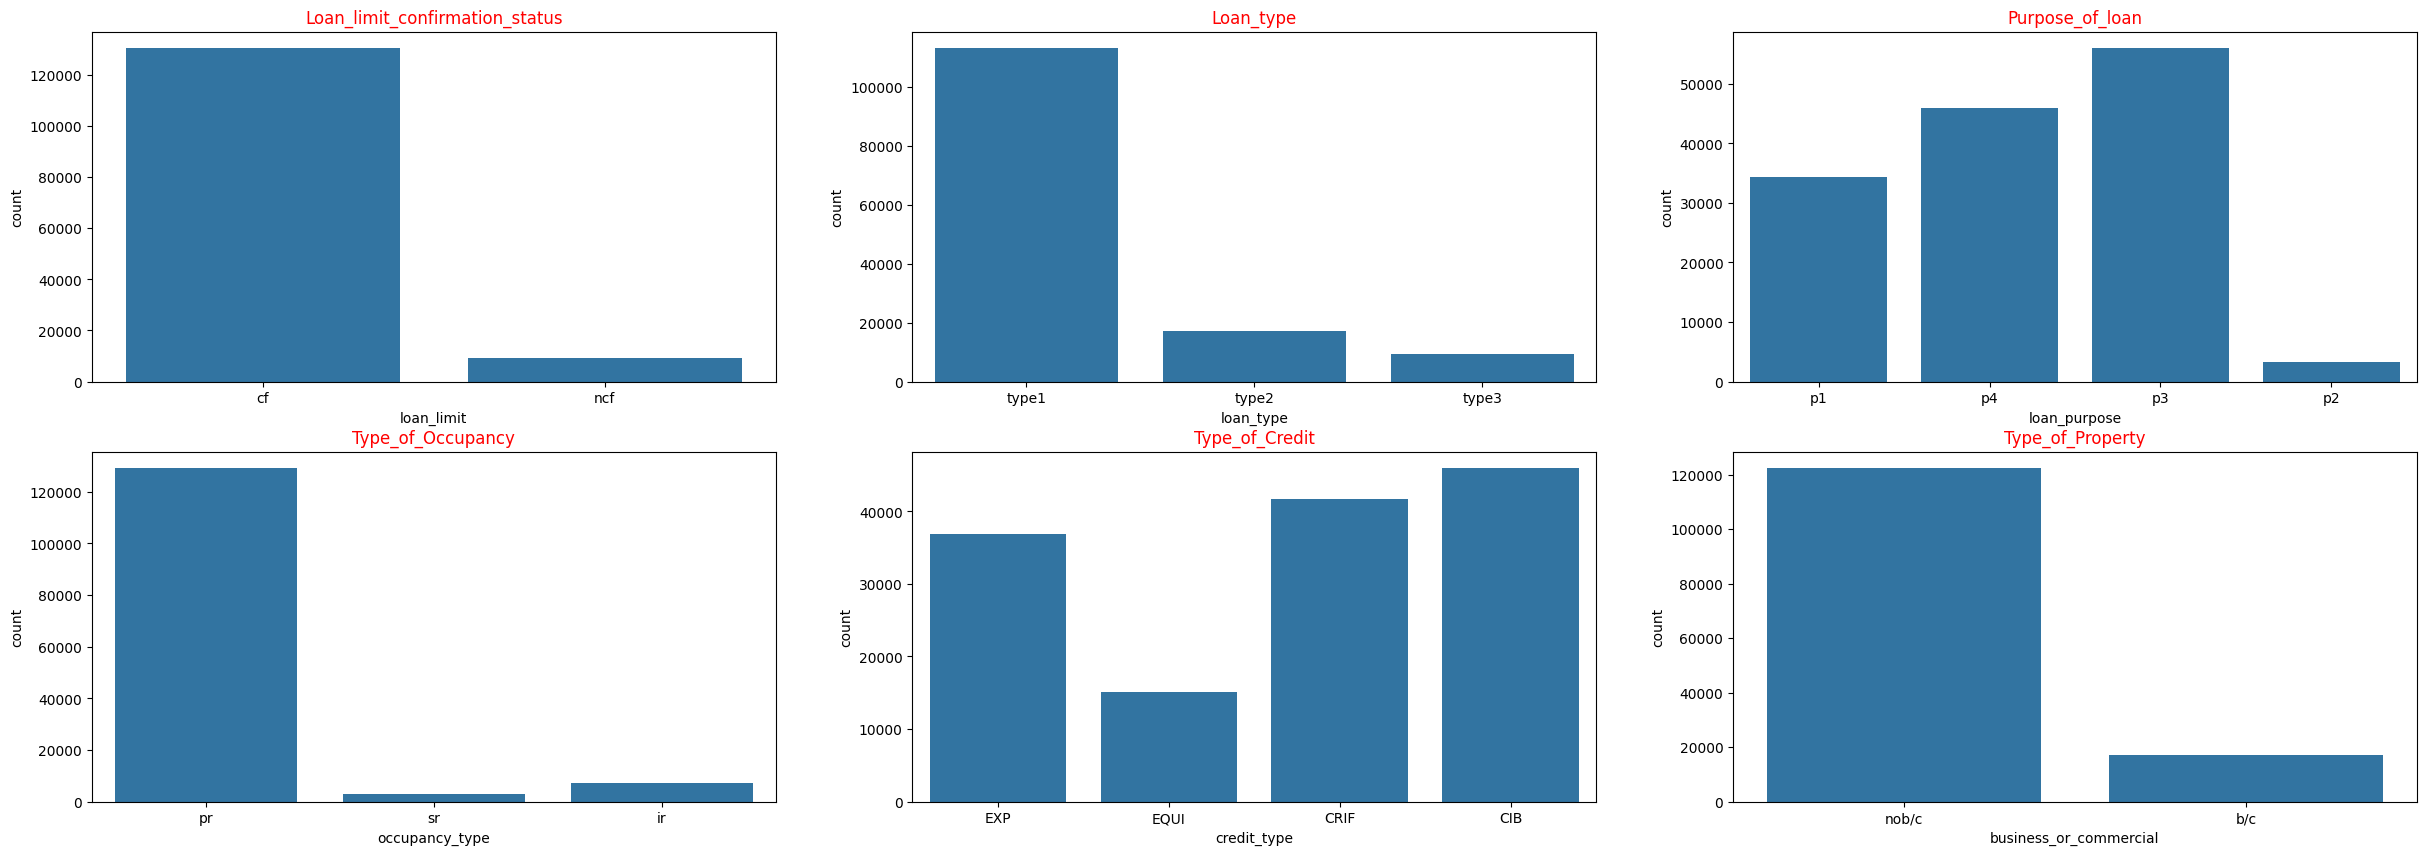

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(30,10))
#custom_palette = sns.color_palette("viridis")

sns.countplot(data=df,x='loan_limit',ax=axes[0,0])
sns.countplot(data=df,x='loan_type',ax=axes[0,1])
sns.countplot(data=df,x='business_or_commercial',ax=axes[1,2])
sns.countplot(data=df,x='occupancy_type',ax=axes[1,0])
sns.countplot(data=df,x='credit_type',ax=axes[1,1])
sns.countplot(data=df,x='loan_purpose',ax=axes[0,2])

axes[0,0].set_title('Loan_limit_confirmation_status',color ='red')
axes[0,1].set_title('Loan_type',color='red')
axes[1,2].set_title('Type_of_Property',color='red')
axes[1,0].set_title('Type_of_Occupancy',color='red')
axes[1,1].set_title('Type_of_Credit',color='red')
axes[0,2].set_title('Purpose_of_loan',color='red')

plt.show()

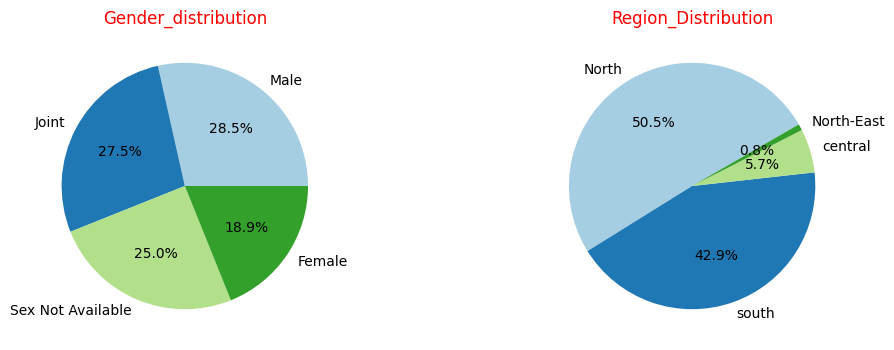

In [ ]:
gender_data=df['Gender'].value_counts()
region_data=df['Region'].value_counts()

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
custom_palette = sns.color_palette("Paired")
axes[0].pie(gender_data.values,labels=gender_data.index,autopct='%1.1f%%',
        colors=custom_palette)
axes[1].pie(region_data.values,labels=region_data.index,autopct='%1.1f%%',startangle=30,
           colors=custom_palette)
axes[0].set_title('Gender_distribution',color='red')
axes[1].set_title('Region_Distribution',color='red')


plt.show()


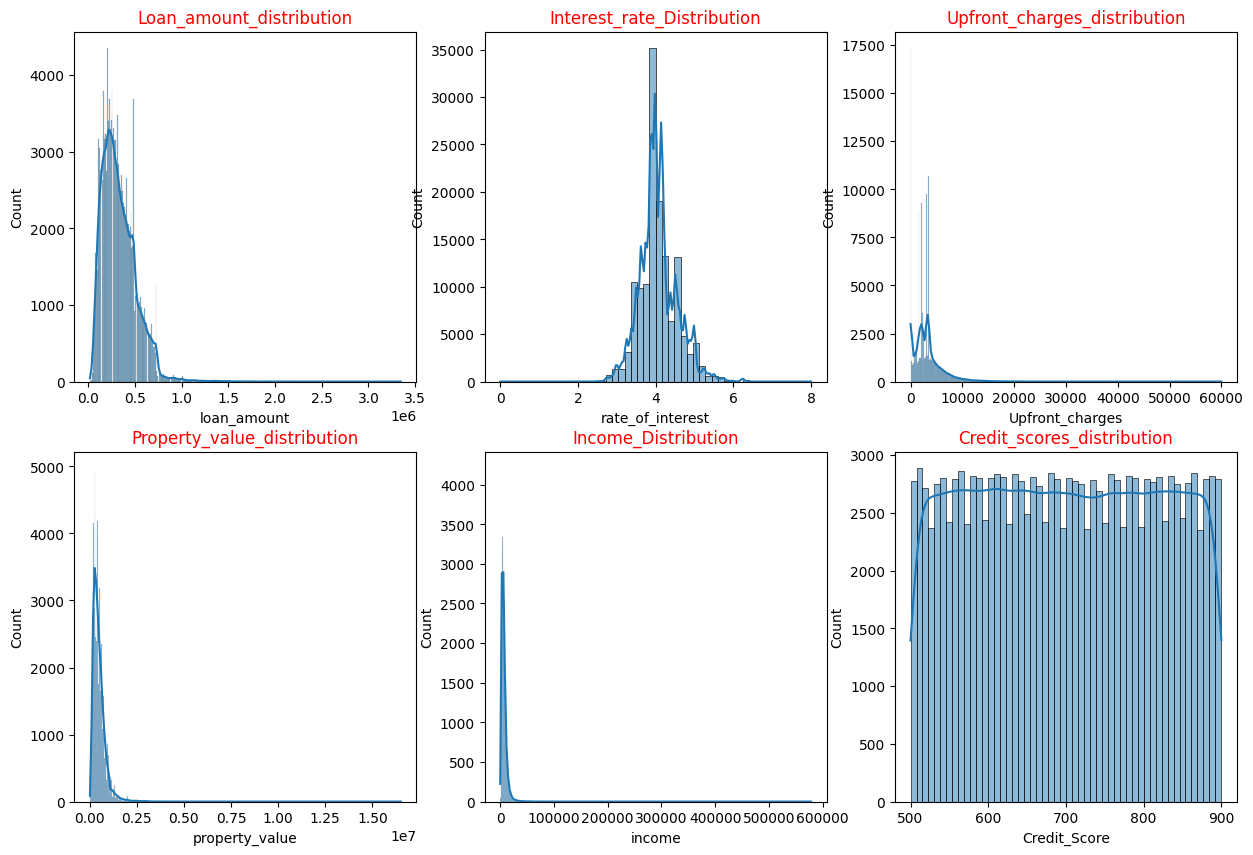

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
custom_palette = sns.color_palette("Set1")

sns.histplot(data=df,x='loan_amount',kde=True,ax=axes[0,0])
sns.histplot(data=df,x='rate_of_interest',bins=50,kde=True,ax=axes[0,1])
sns.histplot(data=df,x='Upfront_charges',kde=True,ax=axes[0,2])
sns.histplot(data=df,x='property_value',kde=True,ax=axes[1,0])
sns.histplot(data=df,x='income',kde=True,ax=axes[1,1])
sns.histplot(data=df,x='Credit_Score',kde=True,ax=axes[1,2])

axes[0,0].set_title('Loan_amount_distribution',color='red')
axes[0,1].set_title('Interest_rate_Distribution',color='red')
axes[0,2].set_title('Upfront_charges_distribution',color='red')
axes[1,0].set_title('Property_value_distribution',color='red')
axes[1,1].set_title('Income_Distribution',color='red')
axes[1,2].set_title('Credit_scores_distribution',color='red')

plt.show()






### Observations
**Categorical columns**
- The data is not evenly distributed across several columns, including **Loan Limit Confirmation Status**, **Loan Type**, **Occupancy Type**, and **Business or Commercial**. This uneven distribution may affect the analysis and interpretation of these variables.

**Numerical columns**

- The distribution of the data is mostly right skewed in the numerical columns such as **Property value**, **Income**,**Upfront charges** and **loan amount** indicating outliers.
- We cannot remove them as clipping them may lead to misinterpretation of the results.
- The **Rate of Interest** column exhibits a normal distribution, while the **Credit Score** column follows a uniform distribution. This indicates that there is likely not much direct effect of these variables on the loan status




## Bi- Varient Analysis

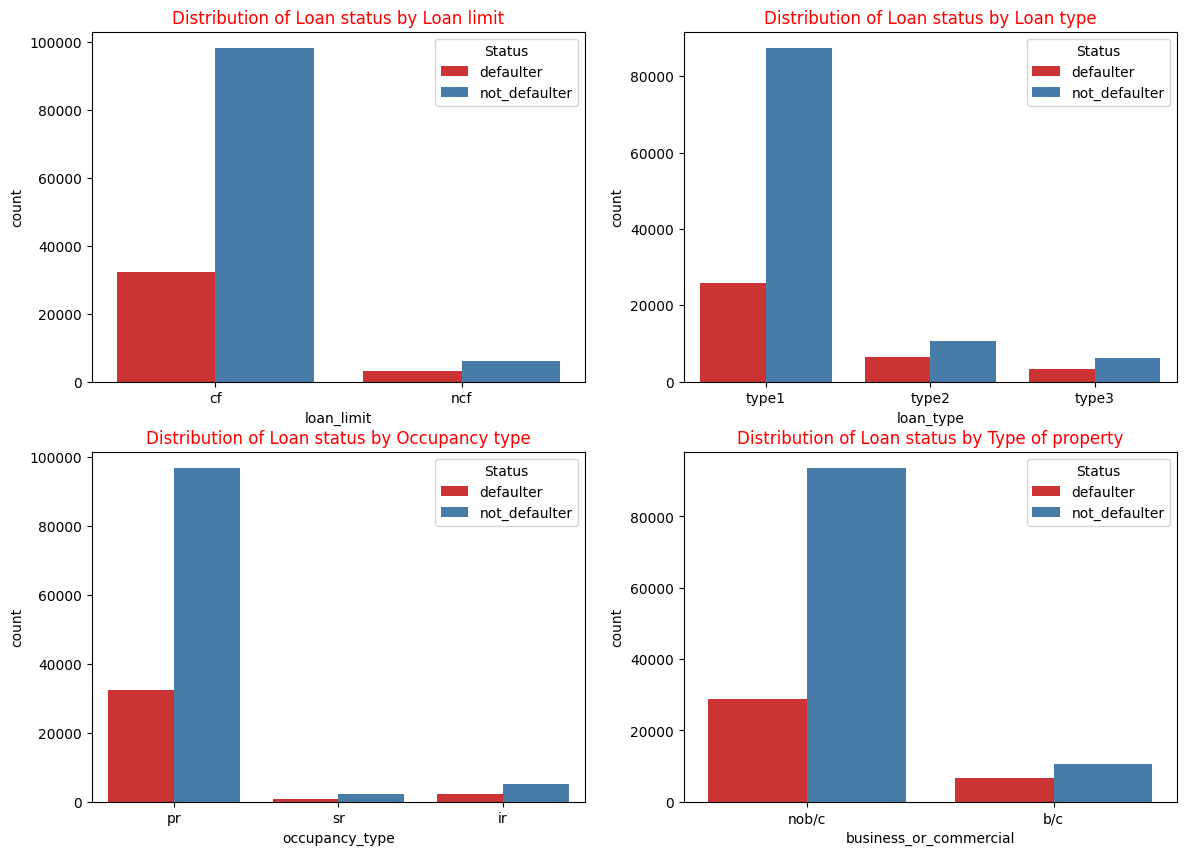

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(14,10))
custom_palette = sns.color_palette('Set1')
sns.countplot(data=df,x='loan_limit',hue='Status',ax=axes[0,0],palette=custom_palette)
sns.countplot(data=df,x='loan_type',hue='Status',ax=axes[0,1],palette=custom_palette)
sns.countplot(data=df,x='occupancy_type',hue='Status',ax=axes[1,0],palette=custom_palette)
sns.countplot(data=df,x='business_or_commercial',hue='Status',ax=axes[1,1],palette=custom_palette)

axes[0,0].set_title('Distribution of Loan status by Loan limit',color='red')
axes[0,1].set_title('Distribution of Loan status by Loan type',color='red')
axes[1,0].set_title('Distribution of Loan status by Occupancy type',color='red')
axes[1,1].set_title('Distribution of Loan status by Type of property',color='red')

plt.show()

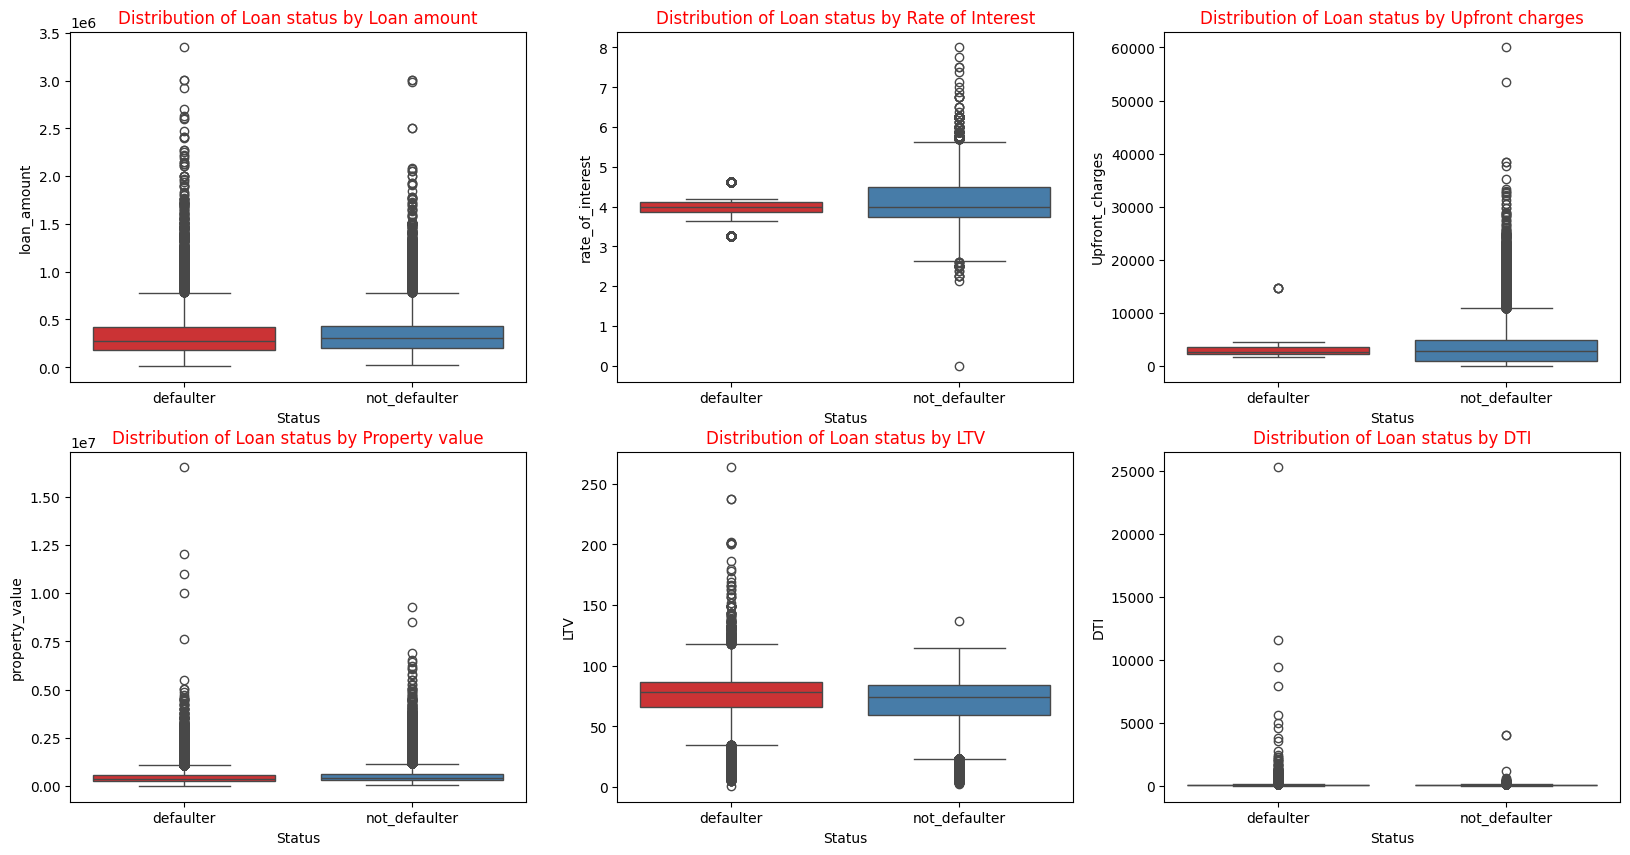

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
sns.boxplot(data=df,y='loan_amount',x='Status',ax=axes[0,0],palette=custom_palette)
sns.boxplot(data=df,y='rate_of_interest',x='Status',ax=axes[0,1],palette=custom_palette)
sns.boxplot(data=df,y='Upfront_charges',x='Status',ax=axes[0,2],palette=custom_palette)
sns.boxplot(data=df,y='property_value',x='Status',ax=axes[1,0],palette=custom_palette)
sns.boxplot(data=df,y='LTV',x='Status',ax=axes[1,1],palette=custom_palette)
sns.boxplot(data=df,y='DTI',x='Status',ax=axes[1,2],palette=custom_palette)


axes[0,0].set_title('Distribution of Loan status by Loan amount',color='red')
axes[0,1].set_title('Distribution of Loan status by Rate of Interest',color='red')
axes[0,2].set_title('Distribution of Loan status by Upfront charges',color='red')
axes[1,0].set_title('Distribution of Loan status by Property value',color='red')
axes[1,1].set_title('Distribution of Loan status by LTV',color='red')
axes[1,2].set_title('Distribution of Loan status by DTI',color='red')
plt.show()

Text(0.5, 1.0, 'Comparison of Defaulters by Credit types')

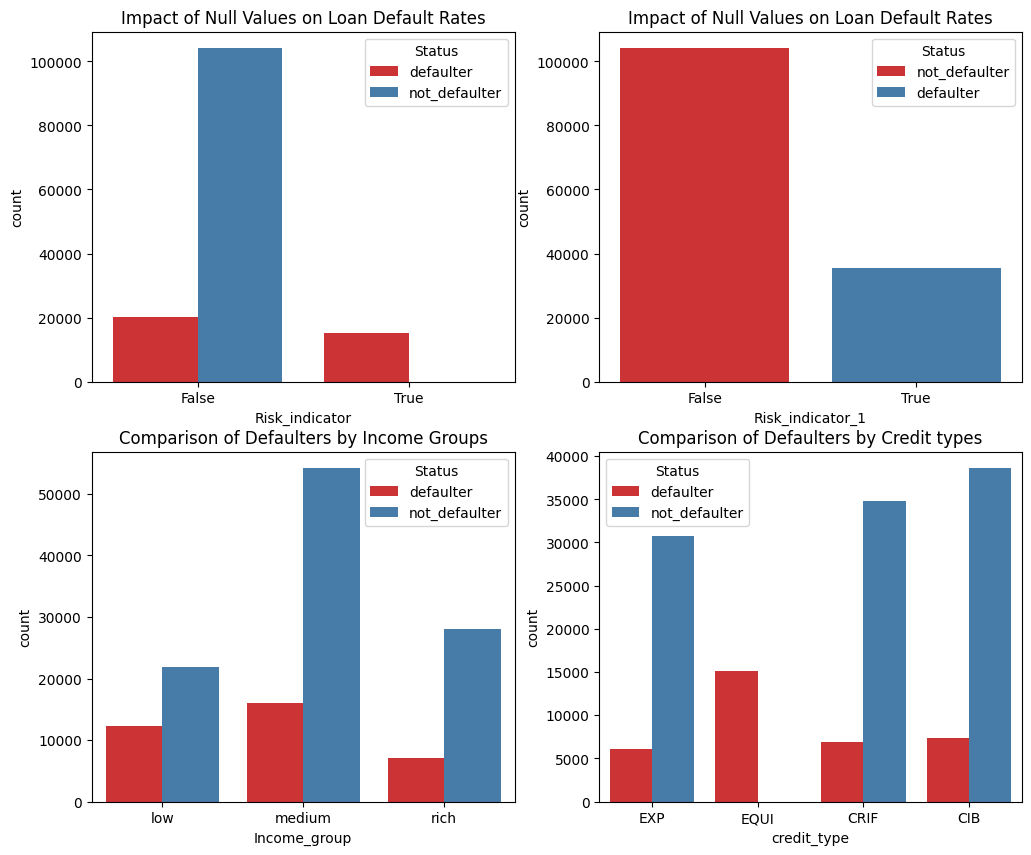

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
sns.countplot(data=df,x='Risk_indicator',hue='Status',palette=custom_palette,ax=axes[0,0])
sns.countplot(data=df,x='Risk_indicator_1',hue='Status',palette=custom_palette,ax=axes[0,1])
sns.countplot(data=df,x='Income_group',hue='Status',palette=custom_palette,ax=axes[1,0])
sns.countplot(data=df,x='credit_type',hue='Status',palette=custom_palette,ax=axes[1,1])

axes[0,0].set_title('Impact of Null Values on Loan Default Rates')
axes[0,1].set_title('Impact of Null Values on Loan Default Rates')
axes[1,0].set_title('Comparison of Defaulters by Income Groups')
axes[1,1].set_title('Comparison of Defaulters by Credit types')

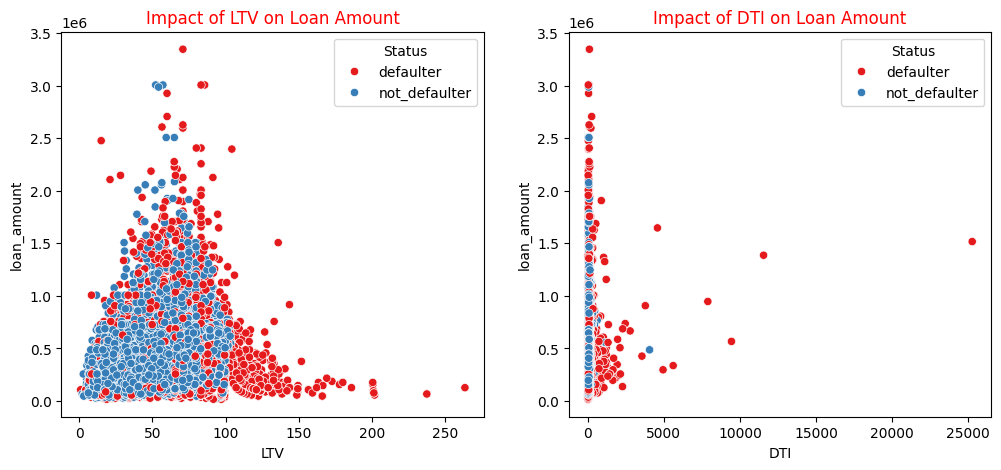

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.scatterplot(data=df,x='LTV',y='loan_amount',hue='Status',ax=axes[0],palette=custom_palette)
sns.scatterplot(data=df,y='loan_amount',x='DTI',hue='Status',ax=axes[1],palette=custom_palette)

axes[0].set_title('Impact of LTV on Loan Amount',color='red')
axes[1].set_title('Impact of DTI on Loan Amount',color='red')
plt.show()

### Observations

- Variables such as **Loan amount** ,**Upfront charges**, **property values** and **rate of interetst** do not have direct impact on target variable of status

- Borrowers with a **confirmed loan limit** show a significantly higher number of **non-defaulters** compared to those without a confirmed limit. A similar trend is observed for borrowers with **primary residence** (PR) as the occupancy type and those with non-business/non-commercial loan purposes, both of which also **have more non-defaulters** compared to their counterparts
- Missing values in key risk indicators correlate with higher default rates, implying that incomplete borrower data may signify higher risk.
-Borrowers with low income and specific credit types like EXP and EQUI show higher default risks.
- High-income borrowers and those associated with CIB credit types exhibit lower default rates, indicating a more stable financial profile
- Higher LTV and DTI values are associated with a greater likelihood of default.

## Multivarient Analysis

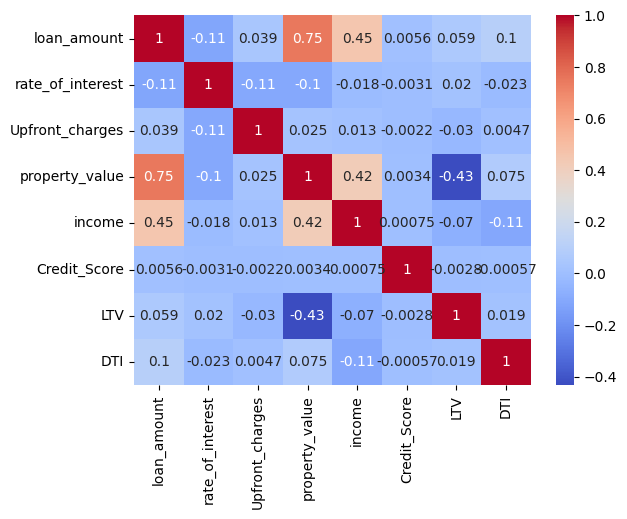

In [ ]:
numer_cols=df[['loan_amount','rate_of_interest','Upfront_charges','property_value','income','Credit_Score','LTV','DTI']]
numer_cols.corr()
sns.heatmap(numer_cols.corr(),annot=True, cmap='coolwarm', cbar=True)
plt.show()


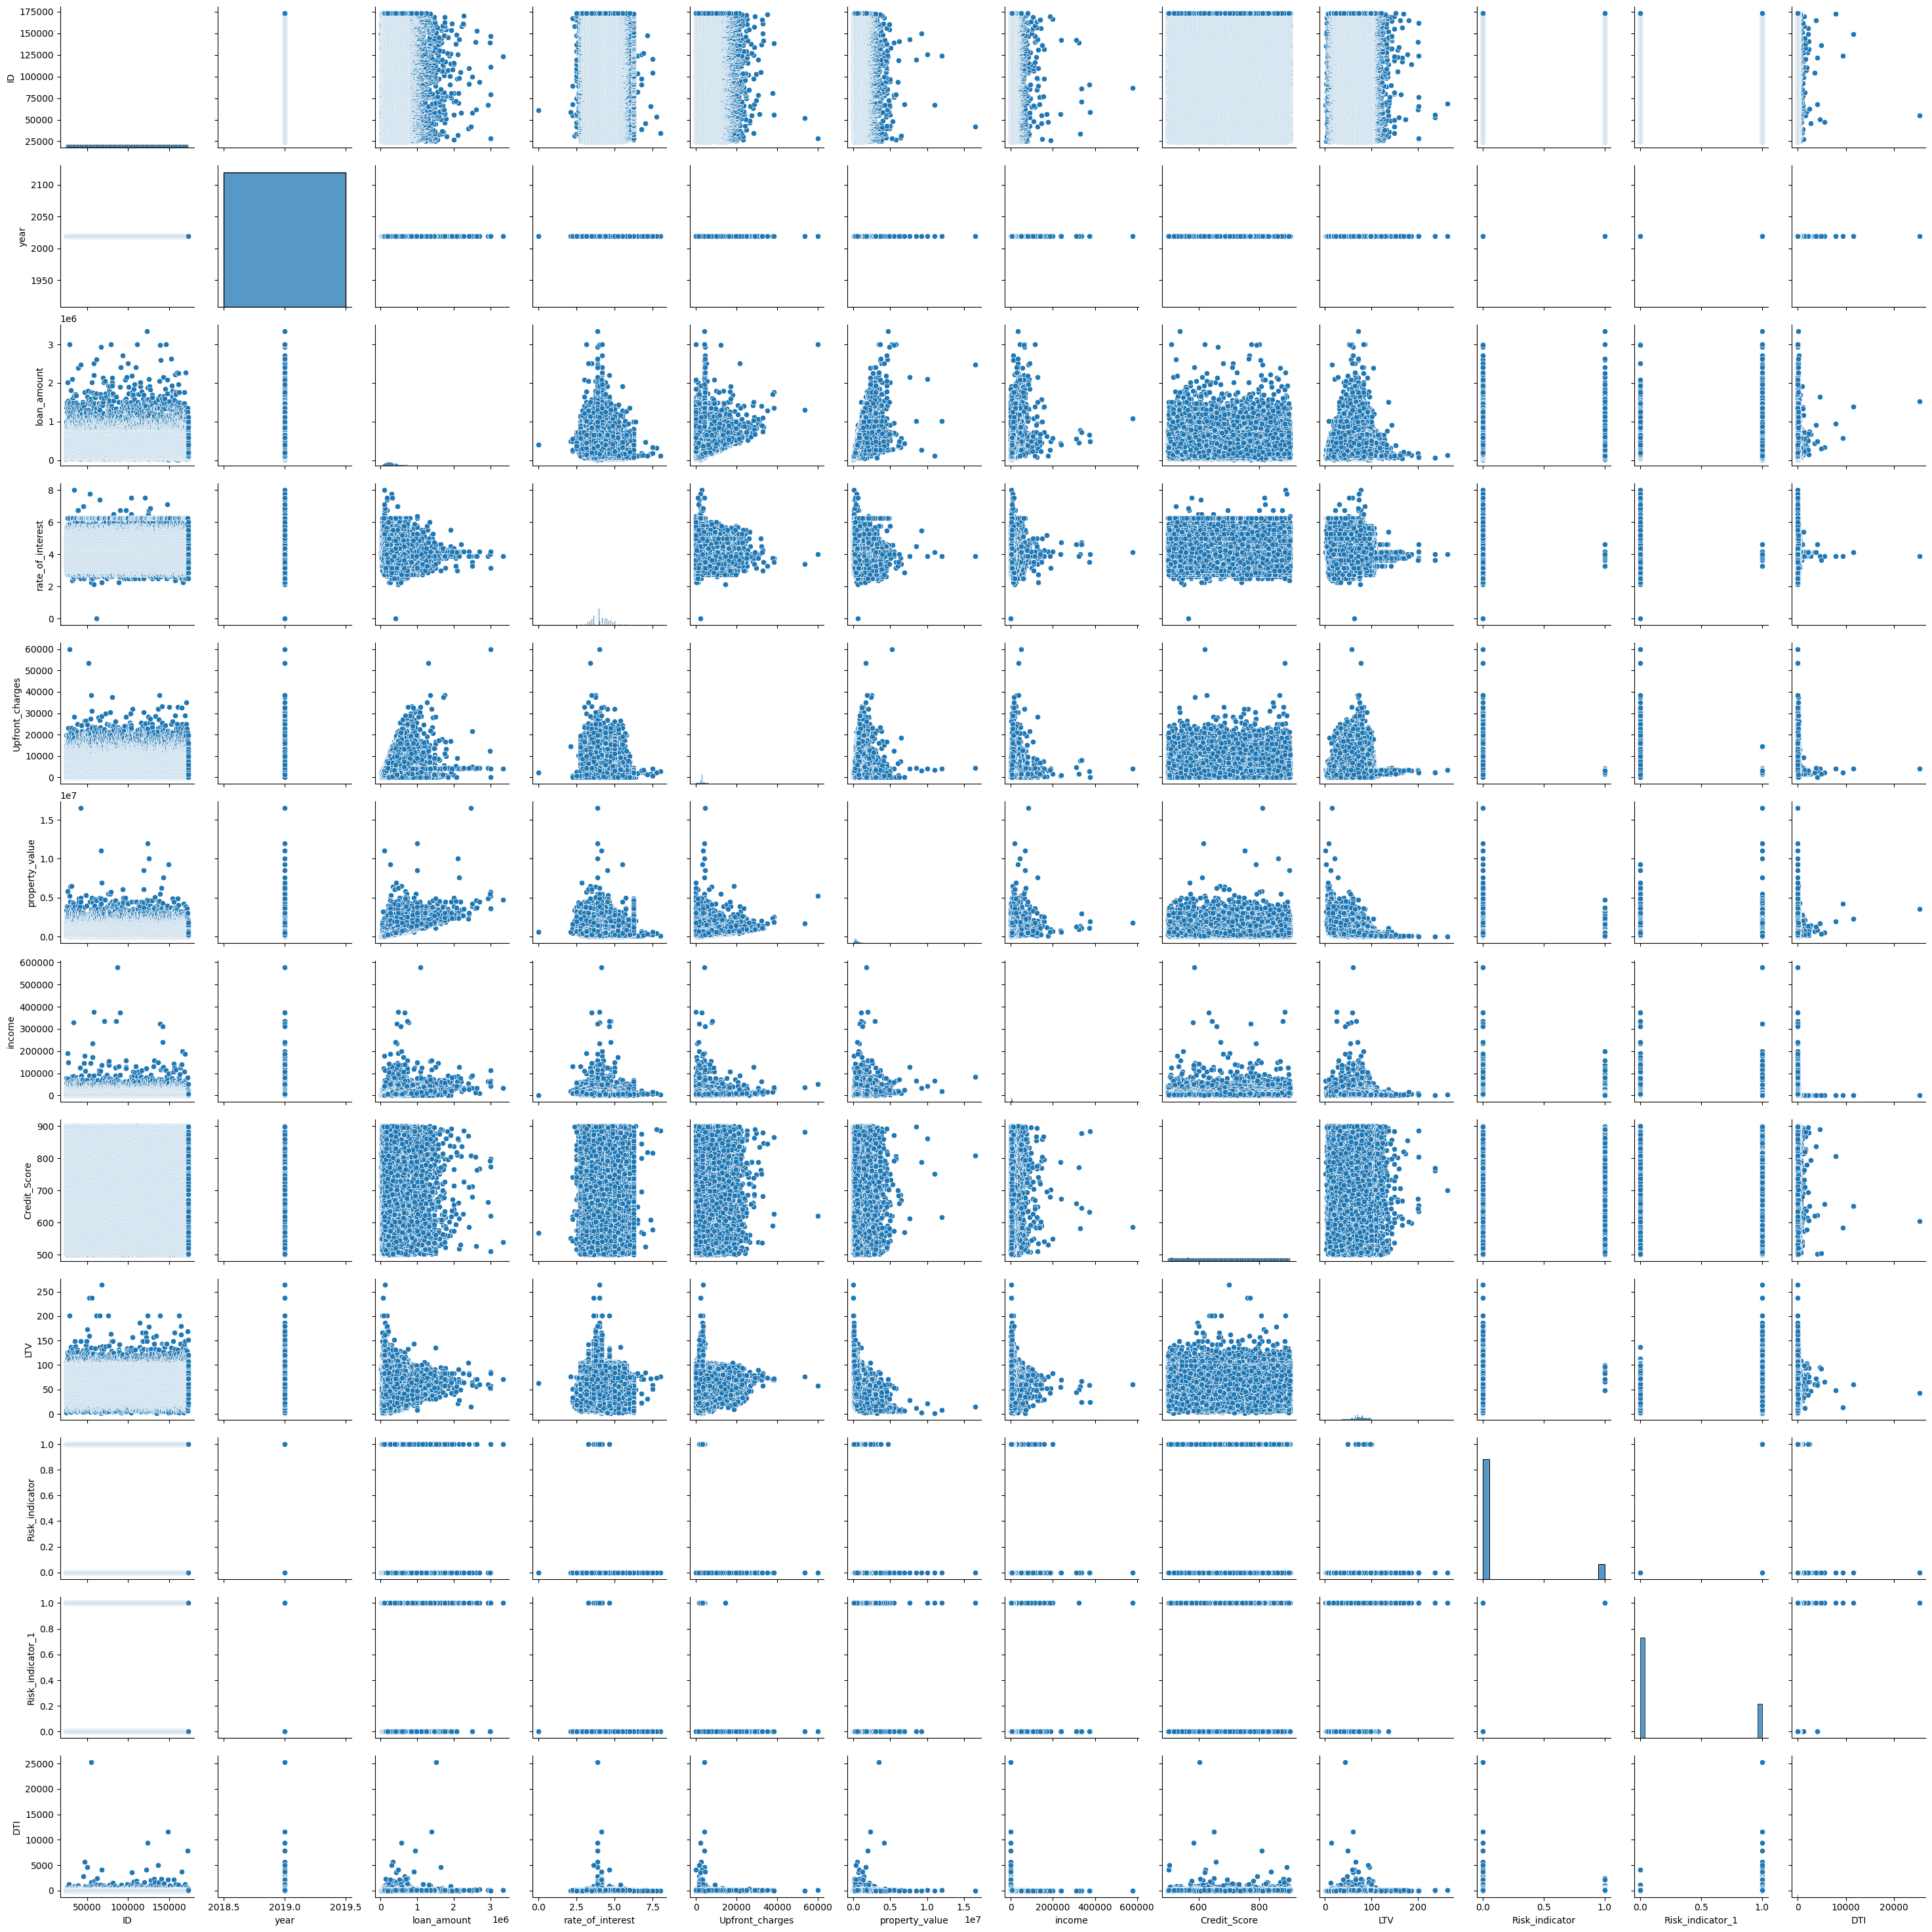

In [ ]:
sns.pairplot(data=df)
plt.show()

### Observations

- There appears to be a **strong positive correlation** between **loan amount** and **property values**.
- The relationships between **income** and **loan amount** as well as **income and property values** show a **weak positive correlation**.
- **LTV (Loan-to-Value ratio)** and **loan amount** demonstrate a **weak negative correlation**.

## Understanding risk factors across various features
- Since loans are typically approved based on factors such as credit score, income, loan type, loan purpose, LTV (Loan-to-Value) ratio, and DTI (Debt-to-Income) ratio, we will analyze these elements to identify key risk factors associated with loan defaults during our risk assessment





###Impact of credit scores, credit type on defaulters


In [ ]:
import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [ ]:
#Checking if loan amount has any affect on default status
#H0: Credit score is not associated with default status( mean of credit score of defaulter and normal re same )
#H1 :Credit score is associated with default status (mean of credit score of defaulter and normal are not  same)

#Calculating mean and pop std deviation
not_defaulter=df[df['Status']=='not_defaulter']['Credit_Score']
defaulter= df[df['Status']=='defaulter']['Credit_Score']

t_statistic, p_value = ttest_ind(not_defaulter,defaulter)

print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Decision Making
alpha = 0.05  # significance level

if p_value <= alpha:
    print("Reject the null hypothesis (H0): Credit score has a significant effect on default status.")
else:
    print("Fail to reject the null hypothesis (H0): No significant effect of Credit score on default status.")

T-statistic: -1.4658800818112363
p-value: 0.14268321284636382
Fail to reject the null hypothesis (H0): No significant effect of Credit score on default status.


Observed values:/n | credit_type   |   defaulter |   not_defaulter |
|:--------------|------------:|----------------:|
| CIB           |        7348 |           38590 |
| CRIF          |        6852 |           34791 |
| EQUI          |       15082 |               1 |
| EXP           |        6117 |           30738 |
Chisquare_stat :49737.03180405551
p_value :0.0
Reject the null hypothesis credit type and Status are dependent


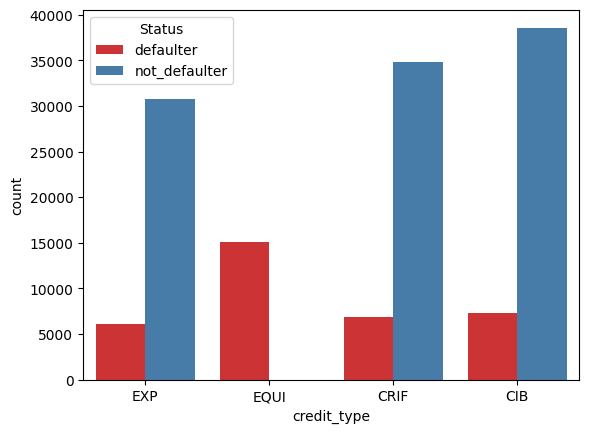

In [ ]:
#Checking the credit type is related to default status.

# SET UP NULL HYPOTHESIS AND ALTERNATE HYPOTHESIS

#Null Hypothesis H0: Credit type  and Status are independent
#ALternate Hypothesis: Credit type and Status are dependent

#Creating a contengency table

contingency_table=pd.crosstab(df['credit_type'],df['Status'])
print(f'Observed values:/n {contingency_table.to_markdown()}')

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chisquare_stat :{chi2_stat}')
print(f'p_value :{p_value}')

#Checking with significance value
alpha=0.05
if p_value<alpha:
  print('Reject the null hypothesis credit type and Status are dependent')
else:
  print('Failed to reject the null hypothesis. credit type and Status are independent')
sns.countplot(data=df,x='credit_type',hue='Status',palette=custom_palette)
plt.show()




Observed values:/n | co-applicant_credit_type   |   defaulter |   not_defaulter |
|:---------------------------|------------:|----------------:|
| CIB                        |       13058 |           57093 |
| EXP                        |       22341 |           47027 |
Chisquare_stat :3402.5099225364806
p_value :0.0
Reject the null hypothesis Co applicant credit type and Status are dependent


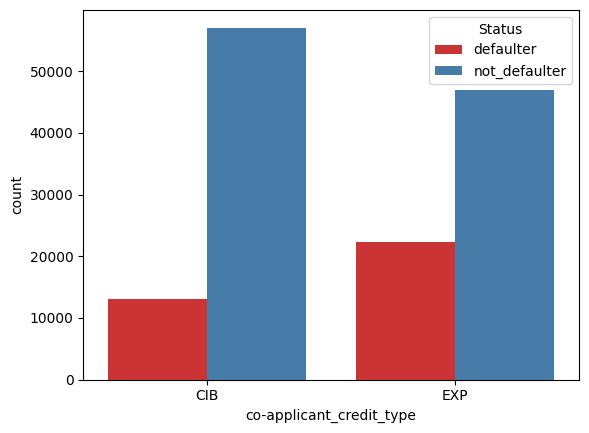

In [ ]:
#Checking the co- applicant credit type is related to default status.

# SET UP NULL HYPOTHESIS AND ALTERNATE HYPOTHESIS

#Null Hypothesis H0: Co-applicant Credit type  and Status are independent
#ALternate Hypothesis: Co-applicant Credit type and Status are dependent

#Creating a contengency table

contingency_table=pd.crosstab(df['co-applicant_credit_type'],df['Status'])
print(f'Observed values:/n {contingency_table.to_markdown()}')

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chisquare_stat :{chi2_stat}')
print(f'p_value :{p_value}')

#Checking with significance value
alpha=0.05
if p_value<alpha:
  print('Reject the null hypothesis Co applicant credit type and Status are dependent')
else:
  print('Failed to reject the null hypothesis. Co applicant-credit type and Status are independent')

sns.countplot(data=df,x='co-applicant_credit_type',hue='Status',palette=custom_palette)
plt.show()



In [ ]:
#Checking if credit type and co-applicant credit type together have any affect on status
df_defaulters = df[df['Status'] == 'defaulter']
combinations = df.groupby(['credit_type', 'co-applicant_credit_type']).size().reset_index(name='total_count')
defaulter_combinations = df_defaulters.groupby(['credit_type', 'co-applicant_credit_type']).size().reset_index(name='defaulter_count')
merged_data = pd.merge(combinations, defaulter_combinations, on=['credit_type', 'co-applicant_credit_type'], how='left').fillna(0)
print(merged_data.to_markdown())


|    | credit_type   | co-applicant_credit_type   |   total_count |   defaulter_count |
|---:|:--------------|:---------------------------|--------------:|------------------:|
|  0 | CIB           | CIB                        |         25849 |              4700 |
|  1 | CIB           | EXP                        |         20089 |              2648 |
|  2 | CRIF          | CIB                        |         23416 |              4396 |
|  3 | CRIF          | EXP                        |         18227 |              2456 |
|  4 | EQUI          | CIB                        |             2 |                 1 |
|  5 | EQUI          | EXP                        |         15081 |             15081 |
|  6 | EXP           | CIB                        |         20884 |              3961 |
|  7 | EXP           | EXP                        |         15971 |              2156 |


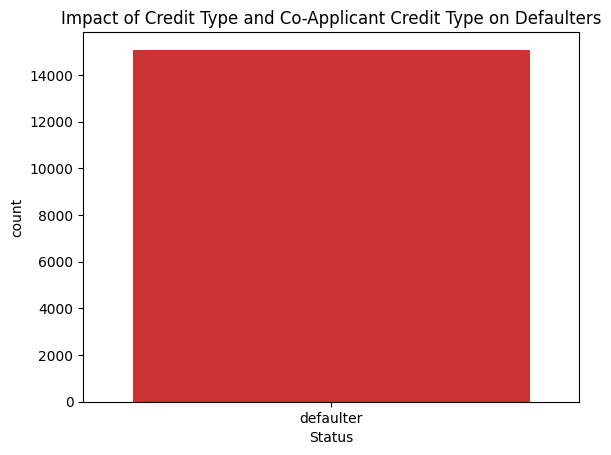

In [ ]:
custom_df=df[(df['credit_type'] =='EQUI') & (df['co-applicant_credit_type']=='EXP')]
sns.countplot(data=custom_df,x='Status',palette=custom_palette)
plt.title('Impact of Credit Type and Co-Applicant Credit Type on Defaulters')
plt.show()


**Observation**
- There is no direct impact of credit score on default status.
- There is an effect of credit type on default status.
- There is a combined effect of credit type and co-applicant credit type on defaulters. Wherever the applicant’s **credit type is EQUI** and the **co-applicant’s credit type is EXP**, everyone has **defaulted**. This is a red flag, and this combination is also directly related to all four columns being null.
-  Applicants with credit type of **EQUI** have always defaulted, but co-applicants with credit type **EXP** have not always defaulted. Its just the combinaion that is red flag here



###Understanding if this combination is affecting the loan amount, which in turn is affecting the status.

- Combination= Applicant credit type **EQUI** and co- applicant credit type **EXP**



- Instances where the applicant's credit type was 'EQUI', the co-applicant's credit type was 'EXP', all the applicant defaulted. What were the loan amounts in these cases?

- Instances where the applicant's credit type was not 'EQUI', but the co-applicant's credit type was 'EXP', and the applicant still defaulted. What were the loan amounts in these case.

In [ ]:
# First finding the the avg loan amounts where credit type was EQUI and co-applicant credit type was EXP and
defaulted_df=df[df['Status']=='defaulter']['loan_amount']
not_defaulted_df=df[df['Status']=='not_defaulter']['loan_amount']
custom_df=df[(df['credit_type'] =='EQUI') & (df['co-applicant_credit_type']=='EXP')]


print('Overall mean of loan amout:',df['loan_amount'].mean())
print('Mean of loan amount where applicants defaulted:',defaulted_df.mean())
print('Mean of loan amount where applicants  did not default:',not_defaulted_df.mean())



a=custom_df['loan_amount'].mean()
print(f'Mean loan amount of defaulters with Credit type as EQUI and Co-applicant credit type as EXP is {a}')




Overall mean of loan amout: 328949.4154917968
Mean of loan amount where applicants defaulted: 319554.04107460665
Mean of loan amount where applicants  did not default: 332143.68036880525
Mean loan amount of defaulters with Credit type as EQUI and Co-applicant credit type as EXP is 329853.8889994032


Mean loan amount of defaulters with Credit type was not EQUI and Co-applicant credit type was EXP is Status
defaulter        357581.267218
not_defaulter    364045.877900
Name: loan_amount, dtype: float64


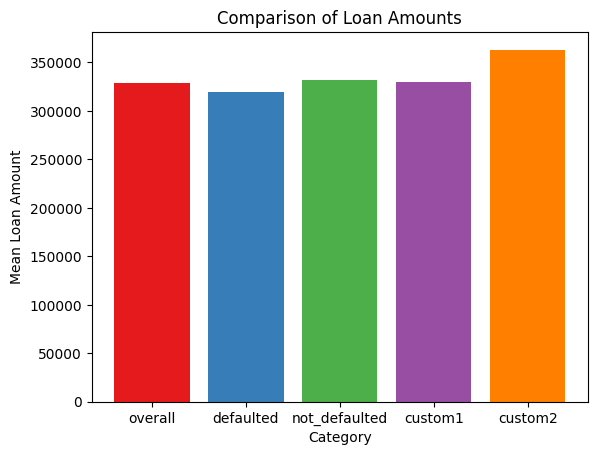

In [ ]:
dff=df[(df['credit_type']!='EQUI') & (df['co-applicant_credit_type']=='EXP')]

a=dff.groupby('Status')['loan_amount'].mean()
print(f'Mean loan amount of defaulters with Credit type was not EQUI and Co-applicant credit type was EXP is {a}')
means=[df['loan_amount'].mean(),defaulted_df.mean(),not_defaulted_df.mean(),custom_df['loan_amount'].mean(),dff['loan_amount'].mean()]
labels =['overall','defaulted','not_defaulted','custom1','custom2']
plt.bar(labels, means,color=custom_palette)
plt.ylabel('Mean Loan Amount')
plt.xlabel('Category')
plt.title('Comparison of Loan Amounts')
plt.show()


**Observations**
- It looks like there is no such big differences in mean of loan amount even for defaulters , not defaulters or be it any condition.
- We already know when applicant is **EQUI** and co-applicant type is **EXP** its an red flag.But the mean of loan amount is also same with this combination.**Since the loan amount does not have a direct effect on the target variable of default status, we performed this analysis to identify which factors influence the loan amount, which in turn may affect the default status**
- There is a slight change in loan amount mean when credit type is **not EQUI**  and and co-applicant type is **still EXP**
- The dataset consists of four distinct credit types for applicant and only two distintc credit types for co-applicants, this might be due to **regulations and guidelines**.

**Note**
- Custom1 = when applicant credit type **EQUI** and co-applicant credit type is **EXP**
- Custom2 = when applicant credit type is **not EQUI** but co-applicant credit type is **still EXP**.



###Identifying different  relationships and potential risk factors associated with loan defaults
- Understanding how loan type and loan purpose impact the loan amount, which subsequently influences the loan status.

In [ ]:
df_defaulted=df[df['Status']=='defaulter']
df_not_defaulted=df[df['Status']=='not_defaulter']
avg_defaulted_loan_amount=df_defaulted.groupby(['business_or_commercial','loan_type', 'loan_purpose'])['loan_amount'].mean().reset_index()
avg_not_defaulted_loan_amount=df_not_defaulted.groupby(['business_or_commercial','loan_type', 'loan_purpose'])['loan_amount'].mean().reset_index()
combined_avg_loan_amount = pd.concat([avg_defaulted_loan_amount, avg_not_defaulted_loan_amount])
print('Segmentation of people who defaulted')
print(' ')
print(avg_defaulted_loan_amount.to_markdown())
print( ' -------------------------------------------------------------------------------')

print( ' -------------------------------------------------------------------------------')
print('Segmentation of people who did not default')
print(' ')
print(avg_not_defaulted_loan_amount.to_markdown())


Segmentation of people who defaulted
 
|    | business_or_commercial   | loan_type   | loan_purpose   |   loan_amount |
|---:|:-------------------------|:------------|:---------------|--------------:|
|  0 | b/c                      | type2       | p1             |      245059   |
|  1 | b/c                      | type2       | p2             |       85120.7 |
|  2 | b/c                      | type2       | p3             |      227884   |
|  3 | b/c                      | type2       | p4             |      257441   |
|  4 | nob/c                    | type1       | p1             |      345300   |
|  5 | nob/c                    | type1       | p2             |      222041   |
|  6 | nob/c                    | type1       | p3             |      323082   |
|  7 | nob/c                    | type1       | p4             |      369088   |
|  8 | nob/c                    | type3       | p1             |      319862   |
|  9 | nob/c                    | type3       | p2             |      

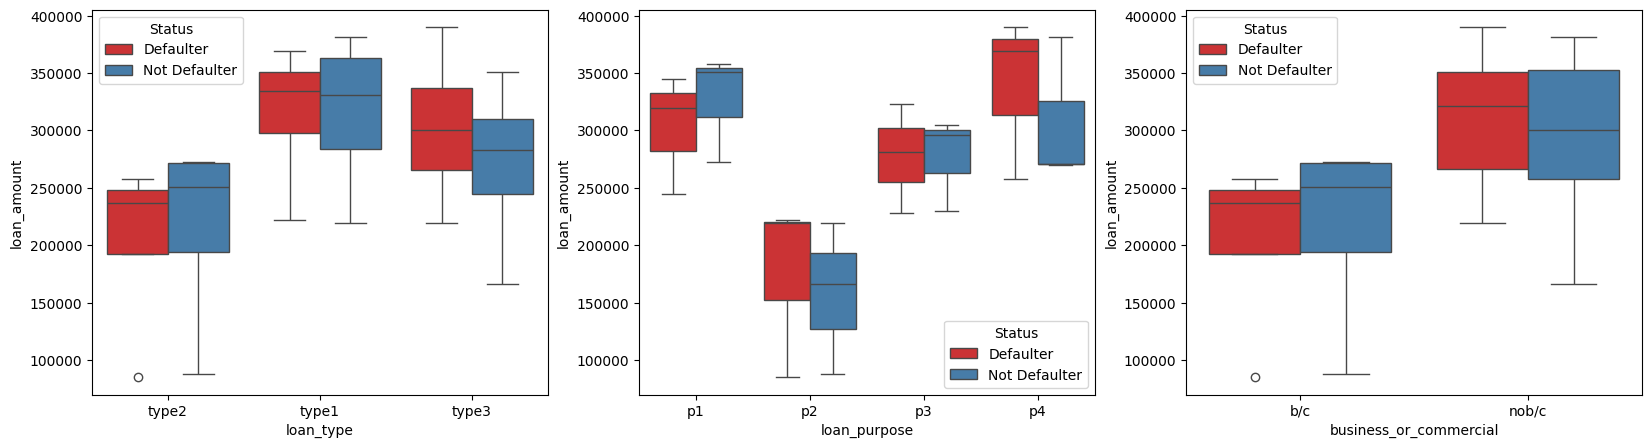

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
sns.boxplot(data=combined_avg_loan_amount,x='loan_type',y='loan_amount',hue='Status',palette=custom_palette,ax=axes[0])
sns.boxplot(data=combined_avg_loan_amount,x='loan_purpose',y='loan_amount',hue='Status',palette=custom_palette,ax=axes[1])
sns.boxplot(data=combined_avg_loan_amount,x='business_or_commercial',y='loan_amount',hue='Status',palette=custom_palette,ax=axes[2])
plt.show()

### Observations
- **Defaulted** borrowers tend to have **higher loan amounts** in **non b/c** compared non default.For example the avg of non b/c with **type 3** and **P4** is 390122 for defaulters while for non defaulters it is 270371.
- Non b/c loans have higher loan amount comparitevely increasing the risk
- Non b/c **type3** and and **P2** have higher loan limit and tend to increasing risks.



#Overall Insights
- This is a loan dataset about **148670** borrowers out of which **36639** defaulted.
- This is an mortgage or construction loan, based on property value column which states that the value of the property for which the loan is taken. It can be understood in such a way that loan is being taken for construction purpose and also occupany type column supprts this assumption well.
- Out of all the records, the rows where **upfront charges, rate of interest, property value, and LTV** are all **null** correspond to **defaulters** indicationg **high risk**
-Additionally, there are 20319 records where only **upfront charges and rate of interest are null**; these also correspond to **defaulters**
-The data is not evenly distributed across several columns, including **Loan Limit Confirmation Status**, **Loan Type**, **Occupancy Type**, and **Business or Commercial**
- The distribution of the data is mostly right skewed in the numerical columns such as Property value, Income,Upfront charges and loan amount indicating outliers.
- Numerical columns such as **Loan amount**, **Upfrontcharges**,'**Credit scores** do not direct impact on target feature ( defaulted or not).
- Similarly categorical features such as **loan type**, **Loan purpose**, **Business or commercial**  also do not show direct relation with target feature.
- However, features such as Loan amount and Property value are interrelated with each other.
- The dataset consists of four distinct credit types for applicant and only two distintc credit types for co-applicants, this might be due to **regulations and guidelines**.


# Key Findings
- **Null Patterns and Defaults**: There are 36,439 rows where two specific columns(Upfront cahrges and rate of interest) are null, and 15,098 rows where four columns (Upfront charges, rate of interest,property value and LTV) are null. In both cases, whenever these columns are null, the borrower has defaulted
- **Credit Type and Default Correlation**: In cases where the borrower's credit type is EQUI and the co-applicant's credit type is EXP, all borrowers defaulted. This suggests a strong link between these specific credit types and loan defaults indicating a red flag.
- **High LTV and DTI Correlation with Defaults**: Borrowers tend to default when the **Loan-to-Value (LTV)** ratio and **Debt-to-Income (DTI)** ratio exceed certain thresholds. This suggests that higher LTV and DTI values are strong indicators of **increased default risk**.
- **Low Default Rates Among High-Income Borrowers**: Borrowers with high incomes and those associated with **CIB** credit types demonstrate lower default rates, indicating a more stable financial profile. This suggests that higher income and specific credit classifications may be protective factors against default.

- **Increased Risk for Specific Types** :
 - **Non b/c** loans with loan type ** type 3** and  loan purpose**P2** have higher loan limits for deafulters and are associated with increased risk, indicating these combinations might need closer scrutiny in risk assessment.
  - **Non b/c** loans with loan **type 3** and loan purpose **P4** have a higher average loan amount for defaulters, indicating elevated risk. These combinations are risky.


#Recommendations

- **Establishing Robust Data Collection Protocols**: Implement standardized procedures for data collection to minimize the occurrence of nulls in critical fields
- **Implement Data Completion Strategies**: To address the correlation between null values in critical columns (such as upfront charges, rate of interest, property value, and LTV) and borrower defaults, implement strategies for data completion.
- **Strengthen verification process**: Given the strong correlation between the credit type combination of EQUI and EXP and borrower defaults, it is crucial to enhance verification processes for applicants with these credit types.

- **Prioritize CIB Credit Type in Loan Approvals**: Given that the association of the CIB credit type with defaulters is comparatively lower in the dataset, it is advisable to prioritize this credit type when approving loans.

- **Enforce Strict DTI and LTV Thresholds**: Ensure that Debt-to-Income (DTI) and Loan-to-Value (LTV) ratios are assessed stringently during the loan approval process. Any loan application that exceeds established thresholds for these ratios should be denied.

